# Finding optimal hyper parameters for a CNN model

The point of this notebook is to obtain an optimal set of parameters for our CNN model to process time based series data. Specifically, we are processing IoT data from TON a well-kept dataset from The UNSW Group in Canberra, Australia.

The specific dataset being discussed here is the IoT Fridge dataset.



We have pip install mealpy each time because it is not a default python package, and every time the runtime refreshes; the package is uninstalled.

In [1]:
%pip install mealpy==3.0.1
%pip install -U scikit-learn
%pip install imbalanced-learn
%pip install matplotlib
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\George\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\George\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\George\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\George\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\George\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Our main libraries used are:

*   Imblearn
*   Pandas
*   Matplot Lib
*   MealPy
*   Numpy
*   SKLearn
*   Tensorflow
*   Time


In [2]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
import numpy
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from mealpy import FloatVar, FOX
import time

# Preparing the Datasets for the CNN Model

We split off the information that indicates whether or not an attack has occured (*label*) and the types of attacks (*type*).
Now there are three dataframes:
  X - all features
  y - attack or not
  y_type - type of attack

We split again into test and train data sets and include some randomness.
**Reset_index** drops the indexes from these new dataframes.
Next, we encode the text data, add another randomness, and scale all dataframes. The X dataframe is reshaped.

In [7]:
#Uncomment for local use
raw_data = pandas.read_csv('../../Train_Test_IoT_dataset/Train_Test_IoT_Fridge.csv')
#Uncomment for Google Colab
#raw_data = pandas.read_csv('Train_Test_IoT_Fridge.csv')
X = raw_data.drop(columns=['label','type'])
y = raw_data['label']
y_type = raw_data['type']

In [ ]:
# Binary
X_train, X_testsplit, y_train, y_testsplit = train_test_split(X, y, test_size=0.2, random_state=777)
# Binary validation
X_test, X_validation, y_test, y_validation = train_test_split(X_testsplit, y_testsplit, test_size=0.5, random_state=777)

#drop index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_validation = X_validation.reset_index(drop=True)
y_validation = y_validation.reset_index(drop=True)

In [ ]:
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.fit_transform(X_test)
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.fit_transform(y_test)
X_validation_encode = encoder.fit_transform(X_validation)
y_validation_encode = label_encoder.fit_transform(y_validation)

In [ ]:
smotetomek = SMOTETomek(random_state=777)
X_rebalance, y_rebalance = smotetomek.fit_resample(X_train_encode, y_train_encode)

In [ ]:
scaler = StandardScaler()
X_rebalance = scaler.fit_transform(X_rebalance)
X_test_encode = scaler.transform(X_test_encode)

X_validation_encode = scaler.transform(X_validation_encode)

In [ ]:
X_rebalance = X_rebalance.reshape(X_rebalance.shape[0], X_rebalance.shape[1], 1)
X_test_encode = X_test_encode.reshape(X_test_encode.shape[0], X_test_encode.shape[1], 1)

X_validation_encode = X_validation_encode.reshape(X_validation_encode.shape[0], X_validation_encode.shape[1], 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 50)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 50)          │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,633 (248.57 KB)

 Trainable params: 63,533 (248.18 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/70
626/626 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5001 - loss: 0.6937 - val_accuracy: 0.3437 - val_loss: 0.6935
Epoch 2/70
626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5063 - loss: 0.6933 - val_accuracy: 0.3795 - val_loss: 0.6934
Epoch 3/70
626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5084 - loss: 0.6929 - val_accuracy: 0.5141 - val_loss: 0.6931
Epoch 4/70
626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5148 - loss: 0.6924 - val_accuracy: 0.5151 - val_loss: 0.6930
Epoch 5/70
626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5143 - loss: 0.6923 - val_accuracy: 0.5056 - val_loss: 0.6930
Epoch 6/70
626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5244 - loss: 0.6920 - val_accuracy: 0.4403 - val_loss: 0.6931
Epoch 7/70
626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5354 - loss: 0.6907 - val_accuracy: 0.4003 - val_loss: 0.6934
Epoch 8/70
626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5374 - loss: 0.6905 - val_accuracy: 0.

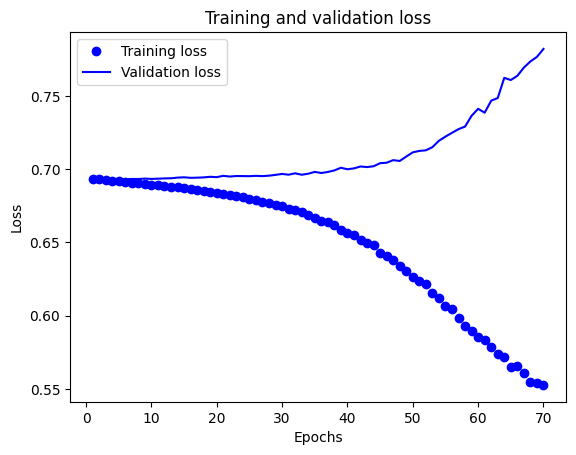

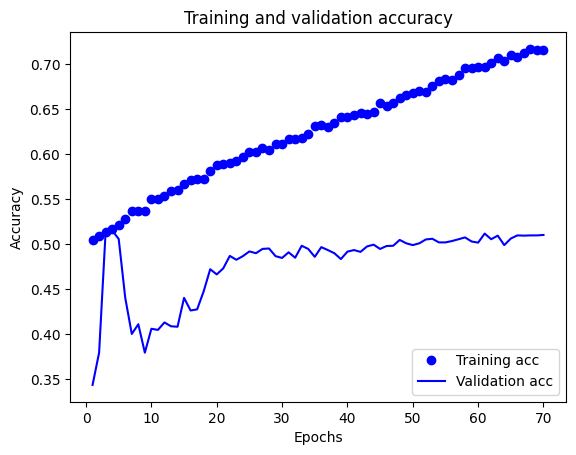


Classification Report
              precision    recall  f1-score   support

           0       0.43      0.86      0.57      1518
           1       0.77      0.30      0.43      2476

    accuracy                           0.51      3994
   macro avg       0.60      0.58      0.50      3994
weighted avg       0.64      0.51      0.48      3994


Confusion Matrix
[[1300  218]
 [1742  734]]


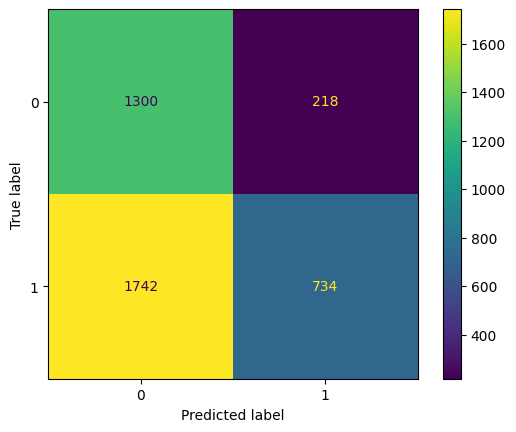

Time taken: 218.0740 seconds


In [ ]:
start_time_1 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=50, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time1 = time.perf_counter()
print(f"Time taken: {end_time1 - start_time_1:0.4f} seconds")

# Optimizing the model
Instead of looking at random number ranges for learning rates, filters, and hidden units, we have encoded specific values.

The hyper parameters we are attempting to optimize are:

*   Batch Size
*   Activation Functions
*   Learning Rates
*   Filters
*   Hidden Units


The base CNN model we made is ingested into *objective_function*.
  This is where our hyper parameters are being considered.
  It returns the Accuracy of that particular iteration.
**LB** and **UB** is set according to the list given above.



In [ ]:
BATCH_ENCODER = LabelEncoder()
BATCH_ENCODER.fit([32, 64, 128])

#act encoder --> Which activation function should be used?
ACT_ENCODER = LabelEncoder()
ACT_ENCODER.fit(['softmax', 'softplus', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

#Learning Rate encoder
LR_ENCODER = LabelEncoder()
LR_ENCODER.fit([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])


#Filter encoder
FILTER_ENCODER = LabelEncoder()
FILTER_ENCODER.fit([25, 50, 75])

#Hidden Units encoder
HIDDEN_ENCODER = LabelEncoder()
HIDDEN_ENCODER.fit([400, 512, 640])

#Dense Layer encoder
DENSE_ENCODER = LabelEncoder()
DENSE_ENCODER.fit([5, 8, 10])

def objective_function(params):
  '''RULES:
      Batch Size - 32, 64, 128
      Activation - softmax, softplus, relu, tanh, sigmoid, hard_sigmoid, linear
      Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1
      Filters - 25, 50, 75
      Hidden Units - 400, 512, 640
      Dense Layers - 5, 8, 10
  '''
  batch_size = BATCH_ENCODER.inverse_transform([int(params[0])])[0]
  activation = ACT_ENCODER.inverse_transform([int(params[1])])[0]
  learning_rate = LR_ENCODER.inverse_transform([int(params[2])])[0]
  filter = FILTER_ENCODER.inverse_transform([int(params[3])])[0]
  hidden_units = HIDDEN_ENCODER.inverse_transform([int(params[4])])[0]
  #dense_layers = DENSE_ENCODER.inverse_transform([int(params[5])])[0]
  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1], X_rebalance.shape[2]))),
  model.add(tensorflow.keras.layers.Conv1D(filters=filter, kernel_size=3, activation='sigmoid')),
  model.add(tensorflow.keras.layers.MaxPooling1D(pool_size=2)),
  model.add(tensorflow.keras.layers.Dropout(0.3)),
  model.add(tensorflow.keras.layers.BatchNormalization()),
  model.add(tensorflow.keras.layers.LSTM(64)),
  model.add(tensorflow.keras.layers.Flatten()),
  model.add(tensorflow.keras.layers.Dense(int(hidden_units), activation=activation)),
  model.add(tensorflow.keras.layers.Dropout(0.5)),
  model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))

  #for i in range(int(dense_layers)):
  #    model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))

  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(X_rebalance, y_rebalance, batch_size=batch_size, epochs=15, validation_data=(X_validation_encode, y_validation_encode), verbose=0)
  min_validation_accuracy = 1-history.history['val_accuracy'][-1]
  print(f"Accuracy {min_validation_accuracy}")
  return min_validation_accuracy

LB = [0, 0, 0, 0, 0]
#LB = [0, 0, 0, 0, 0, 0]
#UB = [2.99, 6.99, 2.99, 2.99, 2.99, 2.99]
UB = [2.99, 6.99, 5.99, 2.99, 2.99]

problem_dict = {
    "obj_func": objective_function,
    "bounds": FloatVar(lb=LB, ub=UB),
    "minmax": "min",
    "verbose": True
}

model = FOX.OriginalFOX(epoch=15, pop_size=20, c1=0.18, c2=0.82)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")
model.history.save_global_objectives_chart(filename="hello/goc")
model.history.save_local_objectives_chart(filename="hello/loc")

model.history.save_global_best_fitness_chart(filename="hello/gbfc")
model.history.save_local_best_fitness_chart(filename="hello/lbfc")

model.history.save_runtime_chart(filename="hello/rtc")

model.history.save_exploration_exploitation_chart(filename="hello/eec")

model.history.save_diversity_chart(filename="hello/dc")

#model.history.save_trajectory_chart(list_agent_idx=[3, 5, 6, 7,], selected_dimensions=[3, 4], filename="hello/tc")
# print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
# print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

#print("\nConfusion Matrix")
#CHANGE ATTACK PREDICTION?
#print(confusion_matrix(y_test, attack_prediction))
#ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
#plt.show()

INFO:mealpy.swarm_based.FOX.OriginalFOX:Solving single objective optimization problem.


Accuracy 0.5106382966041565
Accuracy 0.5774718523025513
Accuracy 0.4708385467529297
Accuracy 0.6157697141170502
Accuracy 0.09386736154556274
Accuracy 0.6157697141170502
Accuracy 0.4851064085960388
Accuracy 0.3694618344306946
Accuracy 0.49737173318862915
Accuracy 0.004755973815917969
Accuracy 0.23304128646850586
Accuracy 0.5118898749351501
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.5707134008407593
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.4392991065979004
Accuracy 0.6157697141170502
Accuracy 0.30137670040130615
Accuracy 0.6157697141170502
Accuracy 0.6190237700939178
Accuracy 0.6157697141170502
Accuracy 0.1406758427619934
Accuracy 0.23904883861541748
Accuracy 0.1101377010345459
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.20300376415252686
Accuracy 0.13466835021972656
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.

INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 1, Current best: 0.1101377010345459, Global best: 0.004755973815917969, Runtime: 1111.96574 seconds


Accuracy 0.13366711139678955
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.29712140560150146
Accuracy 0.6157697141170502
Accuracy 0.7053817212581635
Accuracy 0.6157697141170502
Accuracy 0.09411764144897461
Accuracy 0.560450553894043
Accuracy 0.30237799882888794
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.3309136629104614
Accuracy 0.11464327573776245
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.13366711139678955
Accuracy 0.06382977962493896


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 2, Current best: 0.06382977962493896, Global best: 0.004755973815917969, Runtime: 1239.23618 seconds


Accuracy 0.6157697141170502
Accuracy 0.1479349136352539
Accuracy 0.6155194044113159
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.12190240621566772
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.06733417510986328
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.14192742109298706
Accuracy 0.3842303156852722
Accuracy 0.09812265634536743
Accuracy 0.6157697141170502


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 3, Current best: 0.06733417510986328, Global best: 0.004755973815917969, Runtime: 1130.73133 seconds


Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.5281602144241333
Accuracy 0.09211516380310059
Accuracy 0.6157697141170502
Accuracy 0.13541924953460693
Accuracy 0.1304129958152771
Accuracy 0.03103882074356079
Accuracy 0.3842303156852722
Accuracy 0.01101374626159668
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.05406761169433594
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 4, Current best: 0.01101374626159668, Global best: 0.004755973815917969, Runtime: 1256.60161 seconds


Accuracy 0.13541924953460693
Accuracy 0.021026253700256348
Accuracy 0.38147681951522827
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.0035043954849243164
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 5, Current best: 0.0035043954849243164, Global best: 0.0035043954849243164, Runtime: 1398.42210 seconds


Accuracy 0.0911138653755188
Accuracy 0.6157697141170502
Accuracy 0.30137670040130615
Accuracy 0.16695868968963623
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.30963706970214844
Accuracy 0.10312891006469727
Accuracy 0.0538172721862793
Accuracy 0.14418023824691772
Accuracy 0.6157697141170502
Accuracy 0.07459324598312378
Accuracy 0.30137670040130615
Accuracy 0.1764705777168274
Accuracy 0.23879849910736084
Accuracy 0.2803504467010498
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 6, Current best: 0.0538172721862793, Global best: 0.0035043954849243164, Runtime: 881.19659 seconds


Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.5694618225097656
Accuracy 0.19899874925613403
Accuracy 0.11964958906173706
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.010513126850128174
Accuracy 0.3842303156852722
Accuracy 0.17096370458602905
Accuracy 0.016019999980926514
Accuracy 0.1304129958152771
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.04205256700515747
Accuracy 0.13541924953460693
Accuracy 0.006007492542266846
Accuracy 0.2738422751426697
Accuracy 0.16270339488983154
Accuracy 0.6157697141170502


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 7, Current best: 0.006007492542266846, Global best: 0.0035043954849243164, Runtime: 1098.07749 seconds


Accuracy 0.6157697141170502
Accuracy 0.026032567024230957
Accuracy 0.6157697141170502
Accuracy 0.27183979749679565
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.4790988564491272
Accuracy 0.19974970817565918
Accuracy 0.5869837403297424
Accuracy 0.13892364501953125
Accuracy 0.23629534244537354
Accuracy 0.6157697141170502
Accuracy 0.28735917806625366
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.291864812374115
Accuracy 0.3842303156852722


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 8, Current best: 0.026032567024230957, Global best: 0.0035043954849243164, Runtime: 1182.87960 seconds


Accuracy 0.6387985050678253
Accuracy 0.11664581298828125
Accuracy 0.5244055092334747
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.26257824897766113
Accuracy 0.0372965931892395
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.07584482431411743
Accuracy 0.13591992855072021
Accuracy 0.3046308159828186
Accuracy 0.20725905895233154
Accuracy 0.3842303156852722
Accuracy 0.04755944013595581
Accuracy 0.05882352590560913
Accuracy 0.3842303156852722
Accuracy 0.2332916259765625
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 9, Current best: 0.02503126859664917, Global best: 0.0035043954849243164, Runtime: 1054.46000 seconds


Accuracy 0.02503126859664917
Accuracy 0.3126407861709595
Accuracy 0.13216519355773926
Accuracy 0.27183979749679565
Accuracy 0.1226533055305481
Accuracy 0.07584482431411743
Accuracy 0.6157697141170502
Accuracy 0.17296618223190308
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.1919899582862854
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.04630786180496216
Accuracy 0.3842303156852722
Accuracy 0.239549458026886
Accuracy 0.19674593210220337
Accuracy 0.3842303156852722


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 10, Current best: 0.04630786180496216, Global best: 0.0035043954849243164, Runtime: 1050.82889 seconds


Accuracy 0.3842303156852722
Accuracy 0.04255318641662598
Accuracy 0.4883604645729065
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.2991238832473755
Accuracy 0.04881101846694946
Accuracy 0.6157697141170502
Accuracy 0.029286623001098633
Accuracy 0.6157697141170502
Accuracy 0.3434292674064636
Accuracy 0.15344178676605225
Accuracy 0.29712140560150146
Accuracy 0.08260327577590942
Accuracy 0.03454315662384033
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.2948685884475708


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 11, Current best: 0.029286623001098633, Global best: 0.0035043954849243164, Runtime: 1151.08730 seconds


Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.13441801071166992
Accuracy 0.7647058814764023
Accuracy 0.20250314474105835
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.13391739130020142
Accuracy 0.10888612270355225
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.27234041690826416
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.18197745084762573


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 12, Current best: 0.06558197736740112, Global best: 0.0035043954849243164, Runtime: 1250.84188 seconds


Accuracy 0.06558197736740112
Accuracy 0.13416773080825806
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.29411762952804565
Accuracy 0.13491863012313843
Accuracy 0.204755961894989
Accuracy 0.3842303156852722
Accuracy 0.3839799761772156
Accuracy 0.01126408576965332
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.09987485408782959
Accuracy 0.6157697141170502
Accuracy 0.2668335437774658
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 13, Current best: 0.01126408576965332, Global best: 0.0035043954849243164, Runtime: 1208.17883 seconds


Accuracy 0.31639552116394043
Accuracy 0.20200252532958984
Accuracy 0.3842303156852722
Accuracy 0.04580724239349365
Accuracy 0.09461826086044312
Accuracy 0.3842303156852722
Accuracy 0.058322906494140625
Accuracy 0.6157697141170502
Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.29987484216690063
Accuracy 0.21451812982559204
Accuracy 0.3842303156852722
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.15819776058197021
Accuracy 0.6157697141170502
Accuracy 0.020775973796844482
Accuracy 0.6157697141170502
Accuracy 0.014768481254577637


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 14, Current best: 0.014768481254577637, Global best: 0.0035043954849243164, Runtime: 1131.40346 seconds


Accuracy 0.3842303156852722
Accuracy 0.3842303156852722
Accuracy 0.18548184633255005
Accuracy 0.6157697141170502
Accuracy 0.31589484214782715
Accuracy 0.3842303156852722
Accuracy 0.04931163787841797
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.6157697141170502
Accuracy 0.11289113759994507
Accuracy 0.3041301369667053
Accuracy 0.27434295415878296
Accuracy 0.3123905062675476
Accuracy 0.13366711139678955
Accuracy 0.3842303156852722
Accuracy 0.1371714472770691
Accuracy 0.04931163787841797
Accuracy 0.3206508159637451


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 15, Current best: 0.04931163787841797, Global best: 0.0035043954849243164, Runtime: 1017.79921 seconds


Accuracy 0.6157697141170502
Solution: [2.99       5.65904311 5.99       2.20026759 1.58478236], Fitness: 0.0035043954849243164
Solution: [2.99       5.65904311 5.99       2.20026759 1.58478236], Fitness: 0.0035043954849243164




Solution: [2.99       5.65904311 5.99       2.20026759 1.58478236], Fitness: 0.0035043954849243164

Batch Size - 32, 64, **128**

Activation - softmax, softplus, relu, tanh, sigmoid, **hard_sigmoid**, linear

Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, **0.1**

Filters - 25, 50, **75**

Hidden Units - 400, **512**, 640

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 75)          │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 75)          │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,233 (274.35 KB)

 Trainable params: 70,083 (273.76 KB)

 Non-trainable params: 150 (600.00 B)

Epoch 1/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4945 - loss: 1.4433 - val_accuracy: 0.3842 - val_loss: 1.8847
Epoch 2/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5018 - loss: 1.3819 - val_accuracy: 0.6158 - val_loss: 0.8885
Epoch 3/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5005 - loss: 1.3597 - val_accuracy: 0.3842 - val_loss: 1.3976
Epoch 4/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5010 - loss: 1.3288 - val_accuracy: 0.6158 - val_loss: 1.0751
Epoch 5/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5062 - loss: 1.2678 - val_accuracy: 0.3842 - val_loss: 1.8244
Epoch 6/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4973 - loss: 1.2998 - val_accuracy: 0.6158 - val_loss: 0.9706
Epoch 7/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5081 - loss: 1.1596 - val_accuracy: 0.3842 - val_loss: 1.3461
Epoch 8/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5502 - loss: 0.9495 - val_accuracy: 0.

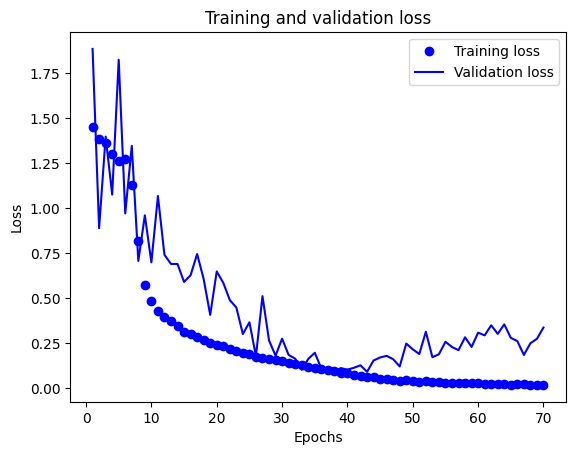

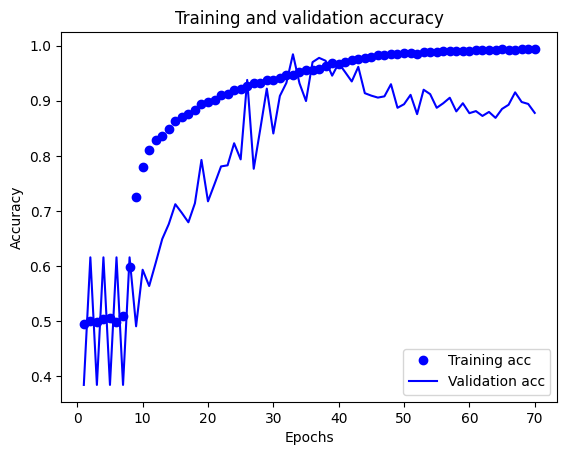


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      1518
           1       0.85      1.00      0.92      2476

    accuracy                           0.89      3994
   macro avg       0.92      0.85      0.87      3994
weighted avg       0.90      0.89      0.88      3994


Confusion Matrix
[[1064  454]
 [   0 2476]]


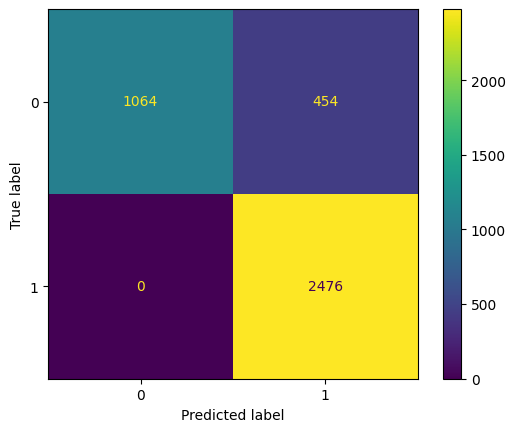

Time taken: 115.0961 seconds


In [ ]:
start_time_2 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=75, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='hard_sigmoid'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.1)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=128, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time2 = time.perf_counter()
print(f"Time taken: {end_time2 - start_time_2:0.4f} seconds")